In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 초기 설정

In [ ]:
# 1. 파일 경로를 지정합니다.
# gs://[버킷_이름]/[파일_경로]/[파일명.csv] 형식으로 입력합니다.
bucket_name = '2pdb09'  # 본인의 버킷 이름으로 변경하세요
file_path = ['aggregate.zip','deaths.zip']  # 버킷 내 파일 경로로 변경하세요
# /content/data/ 라는 폴더를 먼저 생성합니다.
!mkdir -p /content/data/
for i in file_path:
  gcs_path = f'gs://{bucket_name}/{i}'
  # 2. Pandas로 GCS에 있는 CSV 파일을 바로 읽어옵니다.
  try:
      # 생성한 폴더로 파일을 복사합니다.
      !gsutil cp {gcs_path} /content/data/
      print("파일을 성공적으로 불러왔습니다.")

  except Exception as e:
      print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")

Copying gs://2pdb09/aggregate.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

\
Operation completed over 1 objects/1.8 GiB.                                      
파일을 성공적으로 불러왔습니다.
Copying gs://2pdb09/deaths.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

|
Operation completed over 1 objects/2.0 GiB.                                      
파일을 성공적으로 불러왔습니다.


In [ ]:
!unzip /content/data/deaths.zip -d /content/data/deaths

Archive:  /content/data/deaths.zip
  inflating: /content/data/deaths/kill_match_stats_final_0.csv  
  inflating: /content/data/deaths/kill_match_stats_final_1.csv  
  inflating: /content/data/deaths/kill_match_stats_final_2.csv  
  inflating: /content/data/deaths/kill_match_stats_final_3.csv  
  inflating: /content/data/deaths/kill_match_stats_final_4.csv  


### 데이터 전처리

In [ ]:
import polars as pl
import glob # 파일 경로를 쉽게 찾기 위한 라이브러리

# 1. 파일 경로 패턴을 정의합니다.
# * (별표)는 0부터 4까지의 모든 숫자를 의미하는 와일드카드입니다.
file_path_pattern = '/content/data/deaths/kill_match_stats_final_*.csv'

# 2. pl.read_csv()를 사용해 패턴에 맞는 모든 파일을 한 번에 읽고 합칩니다.
# how='vertical'은 기본값이지만, 명시적으로 수직으로(행으로) 합친다는 의미를 보여줍니다.
df_combined = pl.read_csv(file_path_pattern)


# 3. 결과 확인
print("파일 합치기 완료!")
print(f"총 행의 수: {df_combined.shape[0]}")
print(f"총 열의 수: {df_combined.shape[1]}")
print("\n--- 상위 5개 데이터 ---")
print(df_combined.head())

파일 합치기 완료!
총 행의 수: 65370475
총 열의 수: 12

--- 상위 5개 데이터 ---
shape: (5, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ killed_by ┆ killer_na ┆ killer_pl ┆ killer_po ┆ … ┆ victim_na ┆ victim_pl ┆ victim_po ┆ victim_p │
│ ---       ┆ me        ┆ acement   ┆ sition_x  ┆   ┆ me        ┆ acement   ┆ sition_x  ┆ osition_ │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ y        │
│           ┆ str       ┆ f64       ┆ f64       ┆   ┆ str       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Grenade   ┆ KrazyPort ┆ 5.0       ┆ 657725.1  ┆ … ┆ KrazyPort ┆ 5.0       ┆ 657725.1  ┆ 146275.2 │
│           ┆ uguese    ┆           ┆           ┆   ┆ uguese    ┆           ┆           ┆          │
│ SCAR-L    ┆ nide

In [ ]:
df_combined

shape: (65_370_475, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ killed_by ┆ killer_na ┆ killer_pl ┆ killer_po ┆ … ┆ victim_na ┆ victim_pl ┆ victim_po ┆ victim_p │
│ ---       ┆ me        ┆ acement   ┆ sition_x  ┆   ┆ me        ┆ acement   ┆ sition_x  ┆ osition_ │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ y        │
│           ┆ str       ┆ f64       ┆ f64       ┆   ┆ str       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Grenade   ┆ KrazyPort ┆ 5.0       ┆ 657725.1  ┆ … ┆ KrazyPort ┆ 5.0       ┆ 657725.1  ┆ 146275.2 │
│           ┆ uguese    ┆           ┆           ┆   ┆ uguese    ┆           ┆           ┆          │
│ SCAR-L    ┆ nide2Bxia ┆ 31.0      ┆ 93091.37  ┆ … ┆ X3evoluti ┆ 33.0      ┆ 92238.68  ┆ 723375.1 │
│           ┆ ojiejie   ┆           ┆           ┆   ┆ on        ┆           ┆           ┆          │
│ S686      ┆ Ascholes  ┆ 43.0      ┆ 366921.4  ┆ … ┆ CtrlZee   ┆ 46.0      ┆ 367304.5  ┆ 421216.1 │
│ Down and  ┆ Weirdo777 ┆ 9.0       ┆ 472014.2  ┆ … ┆ BlackDpre ┆ 13.0      ┆ 476645.9  ┆ 316758.4 │
│ Out       ┆ 7         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ M416      ┆ Solayuki1 ┆ 9.0       ┆ 473357.8  ┆ … ┆ Vjolt     ┆ 13.0      ┆ 473588.5  ┆ 318418.8 │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ AKM       ┆ Schrade03 ┆ 7.0       ┆ 398569.9  ┆ … ┆ Mc_Popeye ┆ 34.0      ┆ 398698.6  ┆ 291647.1 │
│           ┆           ┆           ┆           ┆   ┆ s         ┆           ┆           ┆          │
│ M16A4     ┆ ManzAreFr ┆ 2.0       ┆ 334218.6  ┆ … ┆ ColiN_143 ┆ 35.0      ┆ 335645.0  ┆ 158006.3 │
│           ┆ ied       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ AKM       ┆ Mint_Pudd ┆ 18.0      ┆ 385246.0  ┆ … ┆ ID-Fuck   ┆ 39.0      ┆ 382191.0  ┆ 114636.4 │
│           ┆ ing       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ AKM       ┆ conemeli  ┆ 8.0       ┆ 159033.9  ┆ … ┆ ChinaJief ┆ 41.0      ┆ 159380.2  ┆ 274879.5 │
│           ┆           ┆           ┆           ┆   ┆ angjun_   ┆           ┆           ┆          │
│ Down and  ┆ JesseMay  ┆ 6.0       ┆ 307497.0  ┆ … ┆ aliugehen ┆ 15.0      ┆ 315360.9  ┆ 450343.4 │
│ Out       ┆           ┆           ┆           ┆   ┆ jimo      ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# --------------------------------------------------------------------------
# 1. 데이터 로딩, 필터링 및 지도별 분리/저장 (수정)
# --------------------------------------------------------------------------
import polars as pl

print("1. 데이터 로딩 및 전처리를 시작합니다...")

# !! 기준 시간 설정 !!
EARLY_GAME_SECONDS = 150 # 초반 탈락 기준 시간 (초)

# 파일 경로 패턴을 정의합니다.
file_path_pattern = '/content/data/deaths/kill_match_stats_final_*.csv'

# 패턴에 맞는 모든 CSV 파일을 한 번에 읽고 합칩니다.
df_combined = pl.read_csv(file_path_pattern)

# 초반 사망 데이터 필터링 ('time' 컬럼 기준)
early_game_deaths_df = df_combined.filter(
    pl.col('time') <= EARLY_GAME_SECONDS
)

# 유효 좌표 범위 필터링
filtered_df = early_game_deaths_df.filter(
    (pl.col('victim_position_x') >= 0) & (pl.col('victim_position_x') <= 800000) &
    (pl.col('victim_position_y') >= 0) & (pl.col('victim_position_y') <= 800000)
)

# --- ▼▼▼ 이 아랫부분이 수정된 내용입니다. ▼▼▼ ---

# 1. 'map' 열을 기준으로 데이터프레임 분리
print("지도(map)에 따라 데이터를 분리합니다...")
df_miramar = filtered_df.filter(pl.col('map') == 'MIRAMAR')
df_erangel = filtered_df.filter(pl.col('map') == 'ERANGEL')

# 2. 각 지도별로 좌표 데이터만 추출
coordinate_data_miramar = df_miramar.select(['victim_position_x', 'victim_position_y'])
coordinate_data_erangel = df_erangel.select(['victim_position_x', 'victim_position_y'])

# 3. 각 지도별 좌표 데이터를 별도의 CSV 파일로 저장
print("각 지도별 좌표 데이터를 CSV 파일로 저장합니다...")
miramar_output_file = 'early_game_coords_miramar.csv'
erangel_output_file = 'early_game_coords_erangel.csv'

coordinate_data_miramar.write_csv(miramar_output_file)
coordinate_data_erangel.write_csv(erangel_output_file)

# 4. 최종 결과 출력
print("\n--- 전처리 완료 ---")
print(f"전체 로드된 데이터: {df_combined.shape[0]} 건")
print(f"초반 {EARLY_GAME_SECONDS}초 내 사망 데이터: {early_game_deaths_df.shape[0]} 건")
print(f"  - 미라마: {coordinate_data_miramar.shape[0]} 건 -> '{miramar_output_file}' 파일로 저장됨")
print(f"  - 에란겔: {coordinate_data_erangel.shape[0]} 건 -> '{erangel_output_file}' 파일로 저장됨")

1. 데이터 로딩 및 전처리를 시작합니다...
지도(map)에 따라 데이터를 분리합니다...
각 지도별 좌표 데이터를 CSV 파일로 저장합니다...

--- 전처리 완료 ---
전체 로드된 데이터: 65370475 건
초반 150초 내 사망 데이터: 7654109 건
  - 미라마: 1504380 건 -> 'early_game_coords_miramar.csv' 파일로 저장됨
  - 에란겔: 6059458 건 -> 'early_game_coords_erangel.csv' 파일로 저장됨


In [ ]:
coordinate_data

shape: (7_654_073, 2)
┌───────────────────┬───────────────────┐
│ victim_position_x ┆ victim_position_y │
│ ---               ┆ ---               │
│ f64               ┆ f64               │
╞═══════════════════╪═══════════════════╡
│ 367304.5          ┆ 421216.1          │
│ 0.0               ┆ 0.0               │
│ 373125.8          ┆ 433608.8          │
│ 370761.1          ┆ 423662.1          │
│ 368015.0          ┆ 421322.6          │
│ …                 ┆ …                 │
│ 0.0               ┆ 0.0               │
│ 169660.8          ┆ 279968.2          │
│ 421601.7          ┆ 324663.6          │
│ 336073.3          ┆ 158540.5          │
│ 553147.4          ┆ 131505.3          │
└───────────────────┴───────────────────┘

In [ ]:
# --------------------------------------------------------------------------
# 2. 클러스터링을 위한 데이터 준비
# --------------------------------------------------------------------------
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from joblib import Parallel, delayed
import polars as pl

print("\n2. 클러스터링을 위한 데이터 준비를 시작합니다...")
X = coordinate_data_erangel.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("NumPy 배열 변환 및 스케일링 완료.")


2. 클러스터링을 위한 데이터 준비를 시작합니다...
NumPy 배열 변환 및 스케일링 완료.


### 최적 탐색


3. (최대 성능) 최적 k 탐색을 시작합니다...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  3.7min remaining: 13.0min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  6.3min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  8.2min remaining: 10.3min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  8.9min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed: 10.7min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 11.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 18.3min finished


탐색 완료! (총 소요 시간: 1095.47초)

BIC 기준, 최적의 클러스터 개수는 40개로 판단됩니다.


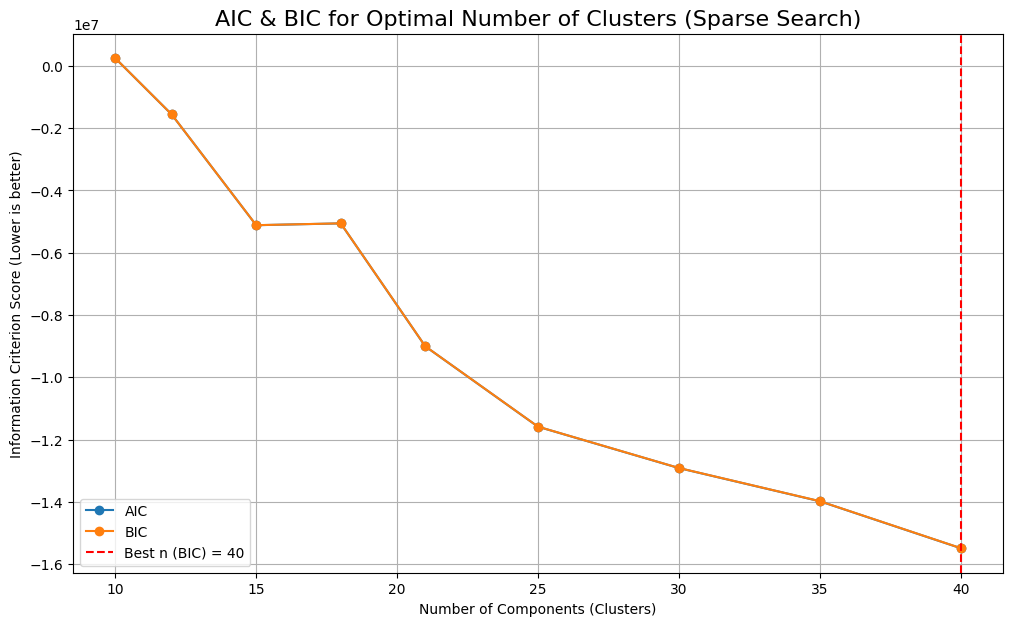

In [ ]:
# --------------------------------------------------------------------------
# 3. 최적의 클러스터 개수 탐색 (최종 수정: 완전 병렬 + 효율적 범위)
# --------------------------------------------------------------------------
print("\n3. (최대 성능) 최적 k 탐색을 시작합니다...")

# (수정) 테스트할 클러스터 개수의 범위를 효율적으로 재설정
n_components_range = [10, 12, 15, 18, 21, 25, 30, 35, 40]

def fit_gmm_and_get_scores(n):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    return gmm.aic(X_scaled), gmm.bic(X_scaled)

start_time = time.time()

# (수정) 메모리가 충분하므로 모든 코어를 사용해(n_jobs=-1) 한 번에 병렬 처리합니다.
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(fit_gmm_and_get_scores)(n) for n in n_components_range
)

end_time = time.time()
print(f"탐색 완료! (총 소요 시간: {end_time - start_time:.2f}초)")

# 결과에서 AIC와 BIC 점수를 분리
aics = [res[0] for res in results]
bics = [res[1] for res in results]

# BIC 점수가 가장 낮은 지점을 찾습니다.
# np.argmin(bics)는 bics 리스트에서 가장 작은 값의 '인덱스'를 반환합니다.
# n_components_range[인덱스]를 통해 실제 k값을 찾습니다.
best_n_bic = n_components_range[np.argmin(bics)]


# --------------------------------------------------------------------------
# 4. 탐색 결과 시각화
# --------------------------------------------------------------------------
print(f"\nBIC 기준, 최적의 클러스터 개수는 {best_n_bic}개로 판단됩니다.")
plt.figure(figsize=(12, 7))
plt.plot(n_components_range, aics, marker='o', label='AIC')
plt.plot(n_components_range, bics, marker='o', label='BIC')
plt.axvline(x=best_n_bic, color='r', linestyle='--', label=f'Best n (BIC) = {best_n_bic}')
plt.title('AIC & BIC for Optimal Number of Clusters (Sparse Search)', fontsize=16)
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Information Criterion Score (Lower is better)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --------------------------------------------------------------------------
# 3-1. (추가 탐색 / 안전 모드) 40-80 범위 최적 k 탐색
# --------------------------------------------------------------------------
import numpy as np
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import time
import csv
import gc
from joblib import Parallel, delayed
import math
import polars as pl

print("\n3-1. (안전 모드) 40-80 범위의 최적 k 탐색을 시작합니다...")

# 40부터 80까지 5개 단위의 새로운 탐색 범위
new_n_components_range = range(40, 76, 5)
# (수정) 한 번에 처리할 작업 수를 4개로 제한하여 메모리 안정성 확보
batch_size = 4
results_file = 'gmm_scores_k40_sparse.csv' # 결과를 추가할 기존 파일 이름

# 이전에 정의한 함수를 그대로 사용
def fit_gmm_and_get_scores(n):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    aic = gmm.aic(X_scaled)
    bic = gmm.bic(X_scaled)
    return n, aic, bic

# 전체 범위를 배치 크기만큼 나누어 루프 실행
num_batches = math.ceil(len(new_n_components_range) / batch_size)
for i in tqdm(range(num_batches), desc="Processing Batches"):
    start_index = i * batch_size
    end_index = start_index + batch_size
    current_batch_range = new_n_components_range[start_index:end_index]

    if not current_batch_range:
        continue

    print(f"\nBatch {i+1}/{num_batches}: n_components = {list(current_batch_range)} 처리 중...")

    # 현재 배치에 대해서만 병렬 처리 (n_jobs=batch_size)
    batch_results = Parallel(n_jobs=batch_size, verbose=5)(
        delayed(fit_gmm_and_get_scores)(n) for n in current_batch_range
    )

    # 'a'(append) 모드로 파일을 열어 새로운 결과를 맨 끝에 추가
    with open(results_file, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(batch_results)

    del batch_results
    gc.collect()

print(f"\n추가 탐색 완료! 결과가 '{results_file}' 파일에 업데이트되었습니다.")


3-1. (안전 모드) 40-80 범위의 최적 k 탐색을 시작합니다...


Processing Batches:   0%|          | 0/2 [00:00<?, ?it/s]


Batch 1/2: n_components = [40, 45, 50, 55] 처리 중...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed: 16.2min remaining: 16.2min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 20.2min finished
Processing Batches:  50%|█████     | 1/2 [20:13<20:13, 1213.01s/it]


Batch 2/2: n_components = [60, 65, 70, 75] 처리 중...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed: 22.3min remaining: 22.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 27.6min finished
Processing Batches: 100%|██████████| 2/2 [47:47<00:00, 1433.64s/it]


추가 탐색 완료! 결과가 'gmm_scores_k40_sparse.csv' 파일에 업데이트되었습니다.


In [ ]:
# --------------------------------------------------------------------------
# 3-2. (수정) 병렬 처리 없이 순차적으로 최적 k 탐색 및 즉시 저장
# --------------------------------------------------------------------------
import numpy as np
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import time
import csv
import polars as pl

print("\n3-2. (순차 처리) 80-100 범위의 최적 k 탐색을 시작합니다...")

# 80부터 100까지 5개 단위의 탐색 범위
new_n_components_range = range(80, 101, 5)
results_file = 'gmm_scores_k40_sparse.csv' # 결과를 추가할 파일 이름

# 이전에 정의한 함수를 그대로 사용
def fit_gmm_and_get_scores(n):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    aic = gmm.aic(X_scaled)
    bic = gmm.bic(X_scaled)
    return [n, aic, bic] # csv.writer.writerow를 위해 리스트로 반환

# --- 병렬 처리 대신 간단한 for 반복문 사용 ---
# tqdm을 적용하여 진행 상황 확인
for n_component in tqdm(new_n_components_range, desc="Fitting GMM sequentially"):

    # 1. GMM 모델 하나를 학습하고 점수 계산
    print(f"\nNow fitting n_components = {n_component}...")
    result_row = fit_gmm_and_get_scores(n_component)

    # 2. 'a'(append) 모드로 파일을 열어 결과 한 줄을 즉시 추가
    with open(results_file, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(result_row)

    print(f"n_components = {n_component} result saved to '{results_file}'.")

print(f"\n탐색 완료! 모든 결과가 '{results_file}' 파일에 업데이트되었습니다.")


3-2. (순차 처리) 80-100 범위의 최적 k 탐색을 시작합니다...


Fitting GMM sequentially:   0%|          | 0/5 [00:00<?, ?it/s]


Now fitting n_components = 80...


Fitting GMM sequentially:  20%|██        | 1/5 [44:27<2:57:48, 2667.16s/it]

n_components = 80 result saved to 'gmm_scores_k40_sparse.csv'.

Now fitting n_components = 85...


Fitting GMM sequentially:  40%|████      | 2/5 [1:31:03<2:17:08, 2742.99s/it]

n_components = 85 result saved to 'gmm_scores_k40_sparse.csv'.

Now fitting n_components = 90...


Fitting GMM sequentially:  60%|██████    | 3/5 [2:04:14<1:19:59, 2399.89s/it]

n_components = 90 result saved to 'gmm_scores_k40_sparse.csv'.

Now fitting n_components = 95...


Fitting GMM sequentially:  80%|████████  | 4/5 [2:38:21<37:40, 2260.61s/it]  

n_components = 95 result saved to 'gmm_scores_k40_sparse.csv'.

Now fitting n_components = 100...


Fitting GMM sequentially: 100%|██████████| 5/5 [3:13:14<00:00, 2318.90s/it]

n_components = 100 result saved to 'gmm_scores_k40_sparse.csv'.

탐색 완료! 모든 결과가 'gmm_scores_k40_sparse.csv' 파일에 업데이트되었습니다.



4. 'gmm_scores_k40_sparse.csv' 파일을 읽어와 결과를 분석합니다...

BIC 기준, 최적의 클러스터 개수는 75개로 판단됩니다.


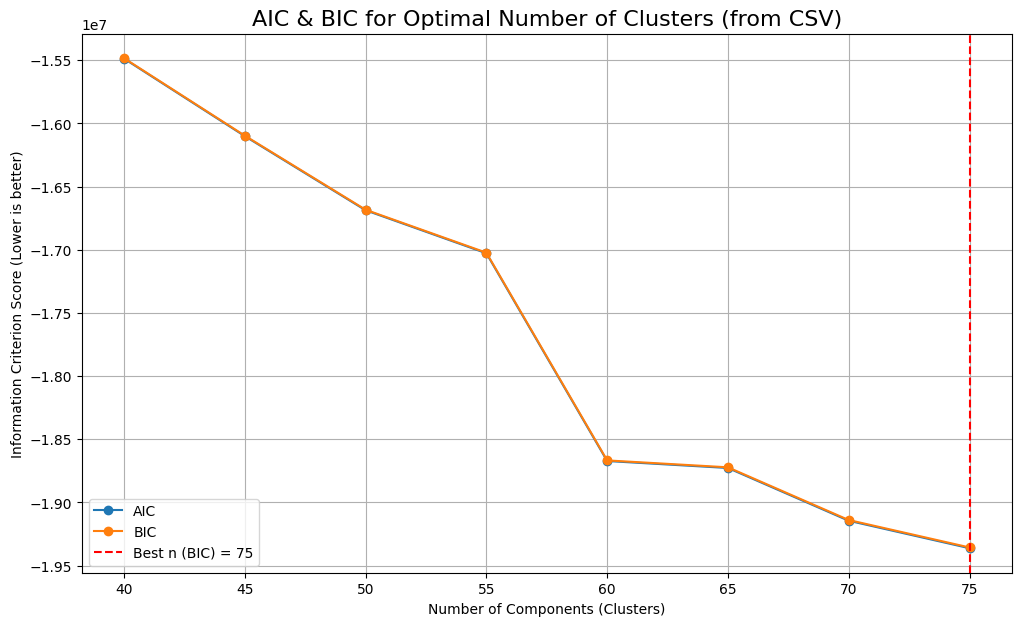

In [ ]:
# --------------------------------------------------------------------------
# 4. 저장된 결과 파일을 읽어와 분석 및 시각화 (수정)
# --------------------------------------------------------------------------
import polars as pl
import matplotlib.pyplot as plt
results_file = 'gmm_scores_k40_sparse.csv'
print(f"\n4. '{results_file}' 파일을 읽어와 결과를 분석합니다...")

# (수정) CSV 파일을 Polars 데이터프레임으로 읽어옵니다.
scores_df = pl.read_csv(
    results_file,
    has_header=False,  # header가 없음을 의미 (Pandas의 header=None 과 동일)
    new_columns=['n_components', 'aic', 'bic']  # 새 컬럼 이름 바로 지정
)

# (수정) 데이터프레임에서 BIC 점수가 가장 낮은 행을 찾아 최적의 k를 찾습니다.
best_row = scores_df.sort('bic').row(0, named=True)
best_n_bic = best_row['n_components']

print(f"\nBIC 기준, 최적의 클러스터 개수는 {best_n_bic}개로 판단됩니다.")

plt.figure(figsize=(12, 7))

# (수정) 리스트 변수 대신 데이터프레임의 열(column)을 사용해 그래프를 그립니다.
plt.plot(scores_df['n_components'], scores_df['aic'], marker='o', label='AIC')
plt.plot(scores_df['n_components'], scores_df['bic'], marker='o', label='BIC')

plt.axvline(x=best_n_bic, color='r', linestyle='--', label=f'Best n (BIC) = {best_n_bic}')
plt.title('AIC & BIC for Optimal Number of Clusters (from CSV)', fontsize=16)
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Information Criterion Score (Lower is better)')
plt.legend()
plt.grid(True)
plt.show()

### 최종 모델 학습


5. 최적의 개수인 40개로 최종 GMM 모델을 학습합니다...
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
최종 클러스터링 결과 저장을 완료했습니다.

6. 최종 클러스터링 결과를 시각화합니다...


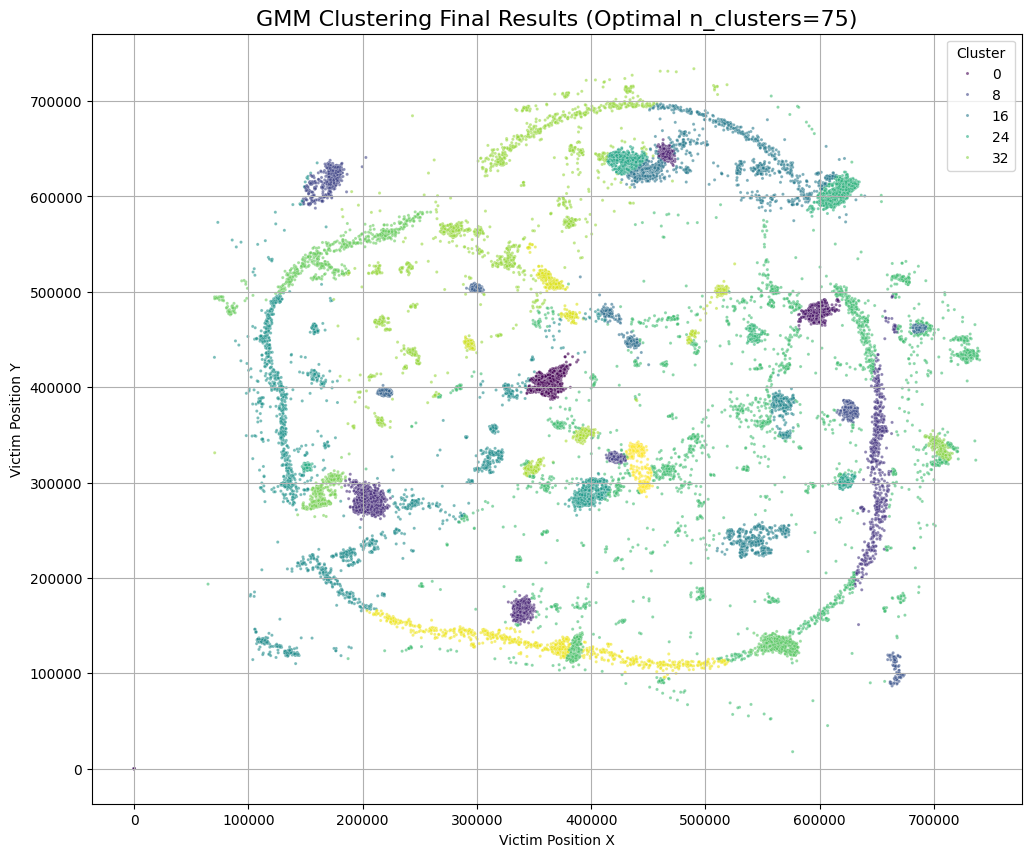


--- 최종 클러스터별 데이터 개수 ---
shape: (40, 2)
┌─────────┬────────┐
│ cluster ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 0       ┆ 279319 │
│ 1       ┆ 376223 │
│ 2       ┆ 78512  │
│ 3       ┆ 196945 │
│ 4       ┆ 212247 │
│ …       ┆ …      │
│ 35      ┆ 37249  │
│ 36      ┆ 17679  │
│ 37      ┆ 98939  │
│ 38      ┆ 51645  │
│ 39      ┆ 94642  │
└─────────┴────────┘


In [ ]:
# --------------------------------------------------------------------------
# 5. 최적의 k로 최종 모델 학습 및 결과 저장
# --------------------------------------------------------------------------
n_compo = 40
print(f"\n5. 최적의 개수인 {n_compo}개로 최종 GMM 모델을 학습합니다...")
final_gmm = GaussianMixture(n_components=n_compo, random_state=42, verbose=1)
final_gmm.fit(X_scaled)
cluster_labels = final_gmm.predict(X_scaled)
results_df = df_erangel.with_columns(pl.Series(name="cluster", values=cluster_labels))
print("최종 클러스터링 결과 저장을 완료했습니다.")


# --------------------------------------------------------------------------
# 6. 최종 결과 시각화
# --------------------------------------------------------------------------
print("\n6. 최종 클러스터링 결과를 시각화합니다...")
sample_df = results_df.sample(n=min(100000, results_df.shape[0]), shuffle=True, seed=42)
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=sample_df.to_pandas(),
    x='victim_position_x',
    y='victim_position_y',
    hue='cluster',
    palette='viridis',
    s=5,
    alpha=0.6
)
plt.title(f'GMM Clustering Final Results (Optimal n_clusters={best_n_bic})', fontsize=16)
plt.xlabel('Victim Position X')
plt.ylabel('Victim Position Y')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\n--- 최종 클러스터별 데이터 개수 ---")
print(results_df['cluster'].value_counts().sort('cluster'))

In [ ]:
import joblib
# 1. 저장할 파일 이름 설정
model_filename = 'final_gmm_model_k40.joblib'

# 2. joblib.dump를 사용하여 모델 객체(final_gmm)를 파일에 저장
joblib.dump(final_gmm, model_filename)

print(f"학습된 GMM 모델이 '{model_filename}' 파일로 저장되었습니다.")

학습된 GMM 모델이 'final_gmm_model_k40.joblib' 파일로 저장되었습니다.


In [ ]:
import joblib

# StandardScaler 객체 저장
joblib.dump(scaler, 'scaler_erangel.joblib')

print("Scaler 저장을 완료했습니다.")

Scaler 저장을 완료했습니다.



6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화합니다...


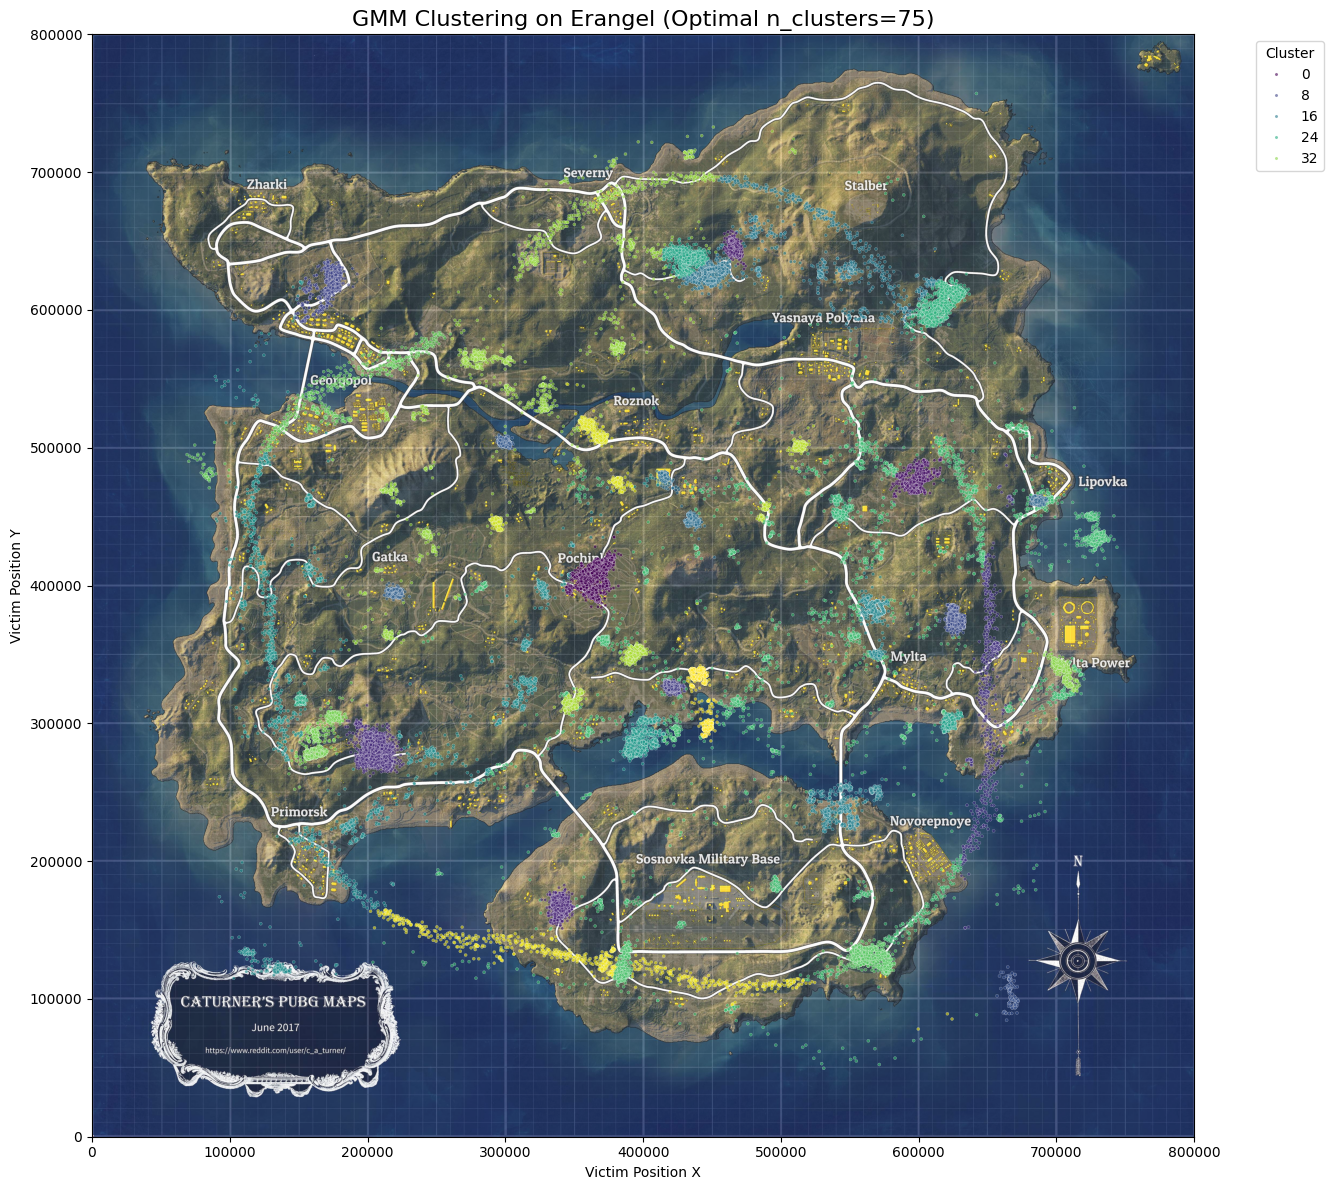


--- 최종 클러스터별 데이터 개수 ---
shape: (40, 2)
┌─────────┬────────┐
│ cluster ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 0       ┆ 279319 │
│ 1       ┆ 376223 │
│ 2       ┆ 78512  │
│ 3       ┆ 196945 │
│ 4       ┆ 212247 │
│ …       ┆ …      │
│ 35      ┆ 37249  │
│ 36      ┆ 17679  │
│ 37      ┆ 98939  │
│ 38      ┆ 51645  │
│ 39      ┆ 94642  │
└─────────┴────────┘


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from PIL import Image # 이미지 로드를 위해 Pillow 라이브러리 필요
# --------------------------------------------------------------------------
# 6. 최종 결과 시각화 (에란겔 맵 위에 겹쳐서)
# --------------------------------------------------------------------------
print("\n6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화합니다...")

# 에란겔 맵 이미지 로드
# 이미지 파일 경로를 정확히 지정해주세요. (예: './content/erangel.jpg' 또는 'erangel.jpg')
erangel_map_img = Image.open('/content/erangel.jpg')

# 데이터 샘플링 (너무 많은 점은 시각화 성능을 저하시킬 수 있으므로)
sample_df_pd = results_df.sample(n=min(100000, results_df.shape[0]), shuffle=True).to_pandas()

plt.figure(figsize=(15, 12)) # 이미지와 어우러지도록 figsize 조정

# 맵 이미지 그리기
# extent 파라미터는 이미지의 좌표 범위를 설정합니다.
# PUBG 맵의 실제 좌표 범위는 보통 0 ~ 800000 (8km) 정도입니다.
# 데이터의 victim_position_x, y가 어떤 스케일을 가지고 있는지 확인하여 extent를 맞춰주세요.
# 만약 데이터가 0~1 스케일이라면 extent=[0, 1, 0, 1] 식으로 조정해야 합니다.
# 여기서는 일반적인 PUBG 맵 좌표 스케일인 0 ~ 800000으로 가정합니다.
# 만약 X, Y 좌표가 0~1 스케일로 정규화되어 있다면, extent=[0, 1, 0, 1] 로 바꿔야 합니다.
# 데이터의 최대/최소 x, y 값을 확인하여 extent를 정확히 설정하는 것이 중요합니다.
plt.imshow(erangel_map_img, extent=[0, 800000, 0, 800000], alpha=0.9)


# 그 위에 클러스터링 결과 산점도 그리기
sns.scatterplot(
    data=sample_df_pd,
    x='victim_position_x',
    y='victim_position_y',
    hue='cluster',
    palette='viridis', # 클러스터 구분을 위한 색상 팔레트
    s=5, # 점의 크기
    alpha=0.6, # 점의 투명도
    ax=plt.gca() # 현재 활성화된 Axes(맵 이미지가 그려진)에 그립니다.
)

plt.title(f'GMM Clustering on Erangel (Optimal n_clusters={best_n_bic})', fontsize=16)
plt.xlabel('Victim Position X')
plt.ylabel('Victim Position Y')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 위치 조정
plt.grid(False) # 맵 이미지 위에 격자는 불필요할 수 있습니다.
plt.gca().set_aspect('equal', adjustable='box') # x, y 축 비율을 동일하게 유지하여 맵이 찌그러지지 않도록
plt.tight_layout() # 그래프 요소들이 잘 보이도록 레이아웃 조정
plt.show()

print("\n--- 최종 클러스터별 데이터 개수 ---")
print(results_df['cluster'].value_counts().sort('cluster'))


6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화합니다...


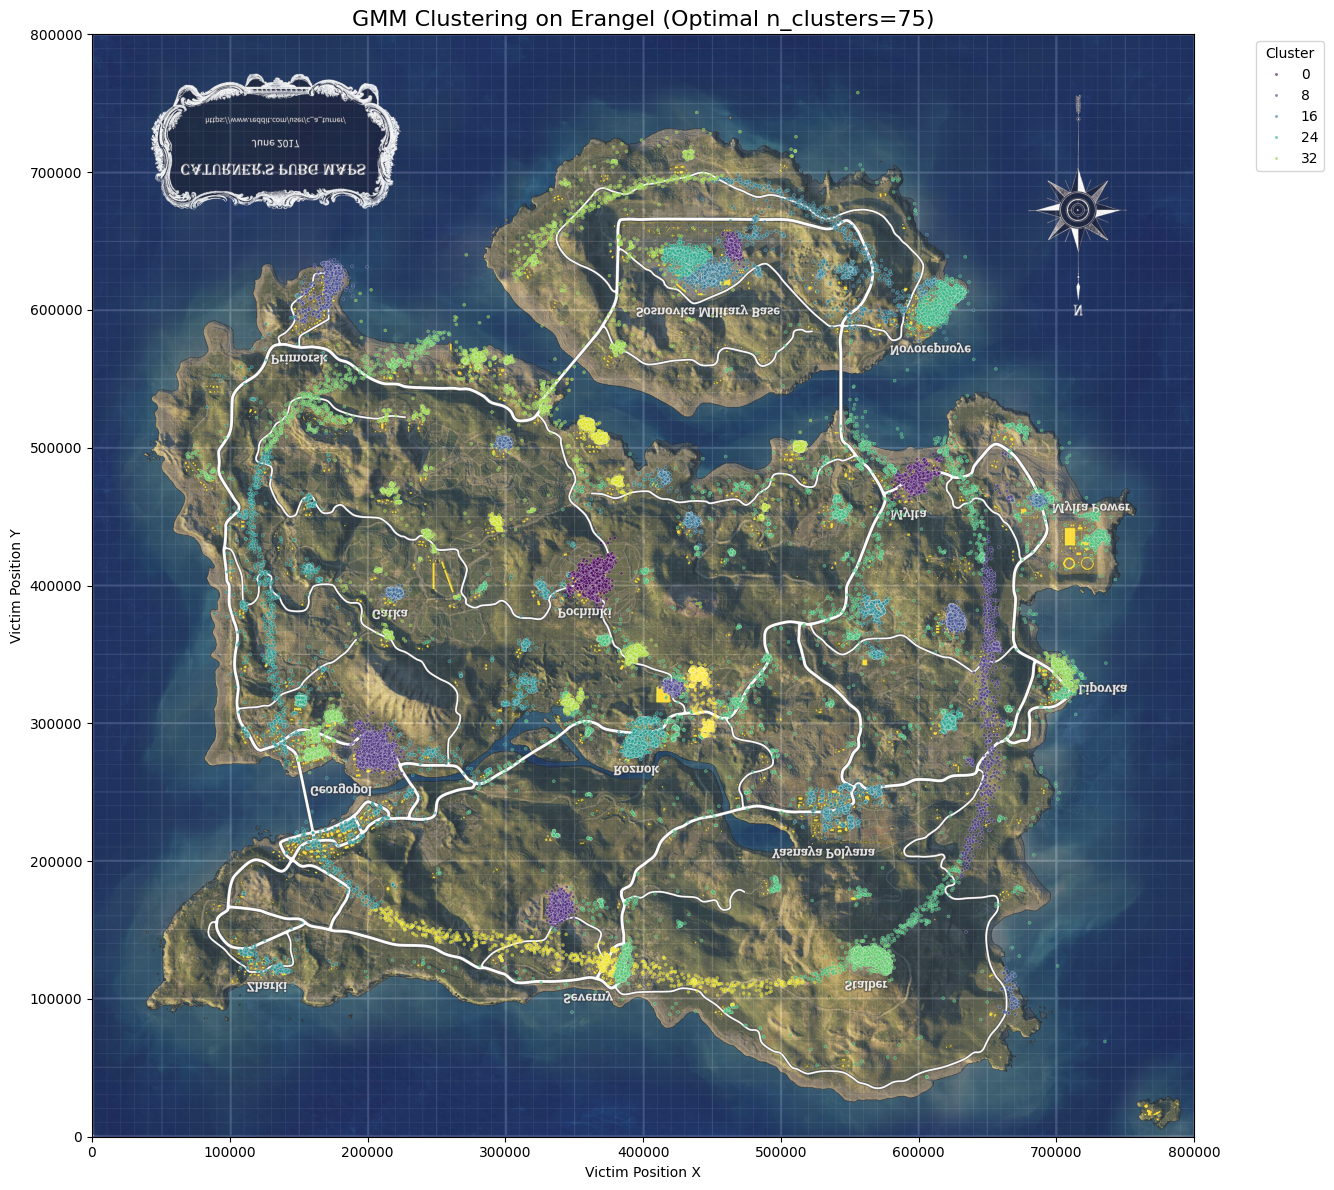


--- 최종 클러스터별 데이터 개수 ---
shape: (40, 2)
┌─────────┬────────┐
│ cluster ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 0       ┆ 279319 │
│ 1       ┆ 376223 │
│ 2       ┆ 78512  │
│ 3       ┆ 196945 │
│ 4       ┆ 212247 │
│ …       ┆ …      │
│ 35      ┆ 37249  │
│ 36      ┆ 17679  │
│ 37      ┆ 98939  │
│ 38      ┆ 51645  │
│ 39      ┆ 94642  │
└─────────┴────────┘


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from PIL import Image # 이미지 로드를 위해 Pillow 라이브러리 필요

# --------------------------------------------------------------------------
# 6. 최종 결과 시각화 (에란겔 맵 위에 겹쳐서)
# --------------------------------------------------------------------------
print("\n6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화합니다...")

# 에란겔 맵 이미지 로드
erangel_map_img = Image.open('/content/erangel.jpg')

# [수정] 맵 이미지를 상하로 뒤집습니다.
erangel_map_img = erangel_map_img.transpose(Image.FLIP_TOP_BOTTOM)

# 데이터 샘플링 (너무 많은 점은 시각화 성능을 저하시킬 수 있으므로)
sample_df_pd = results_df.sample(n=min(100000, results_df.shape[0]), shuffle=True).to_pandas()

plt.figure(figsize=(15, 12)) # 이미지와 어우러지도록 figsize 조정

# 맵 이미지 그리기 (기존 코드와 동일)
# 데이터의 최대/최소 x, y 값을 확인하여 extent를 정확히 설정하는 것이 중요합니다.
plt.imshow(erangel_map_img, extent=[0, 800000, 0, 800000], alpha=0.9)


# 그 위에 클러스터링 결과 산점도 그리기
sns.scatterplot(
    data=sample_df_pd,
    x='victim_position_x',
    y='victim_position_y',
    hue='cluster',
    palette='viridis', # 클러스터 구분을 위한 색상 팔레트
    s=5, # 점의 크기
    alpha=0.6, # 점의 투명도
    ax=plt.gca() # 현재 활성화된 Axes(맵 이미지가 그려진)에 그립니다.
)

plt.title(f'GMM Clustering on Erangel (Optimal n_clusters={best_n_bic})', fontsize=16)
plt.xlabel('Victim Position X')
plt.ylabel('Victim Position Y')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 위치 조정
plt.grid(False) # 맵 이미지 위에 격자는 불필요할 수 있습니다.
plt.gca().set_aspect('equal', adjustable='box') # x, y 축 비율을 동일하게 유지하여 맵이 찌그러지지 않도록
plt.tight_layout() # 그래프 요소들이 잘 보이도록 레이아웃 조정
plt.show()

print("\n--- 최종 클러스터별 데이터 개수 ---")
print(results_df['cluster'].value_counts().sort('cluster'))

### 테스트 75

--- 3. 데이터 로딩: /content/early_game_coords_erangel.csv ---
데이터 로딩 완료. 총 6059458개 행 -> (0,0) 좌표 제거 후 5683235개 행 사용.

--- 4. 스케일러 및 GMM 모델 로딩 ---
스케일러 로딩 성공: /content/scaler_erangel.joblib
GMM 모델 로딩 성공: /content/final_gmm_model_k75.joblib

--- 5. 데이터 스케일링 및 클러스터 예측 수행 ---
데이터 스케일링 적용 완료.
클러스터 예측 완료.
shape: (5, 3)
┌───────────────────┬───────────────────┬─────────┐
│ victim_position_x ┆ victim_position_y ┆ cluster │
│ ---               ┆ ---               ┆ ---     │
│ f64               ┆ f64               ┆ i64     │
╞═══════════════════╪═══════════════════╪═════════╡
│ 466214.9          ┆ 641051.5          ┆ 32      │
│ 446698.3          ┆ 621034.1          ┆ 26      │
│ 433497.2          ┆ 635122.9          ┆ 3       │
│ 464351.3          ┆ 640805.6          ┆ 32      │
│ 446780.2          ┆ 629792.2          ┆ 59      │
└───────────────────┴───────────────────┴─────────┘

--- 6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화 (좌상단 0,0 기준) ---


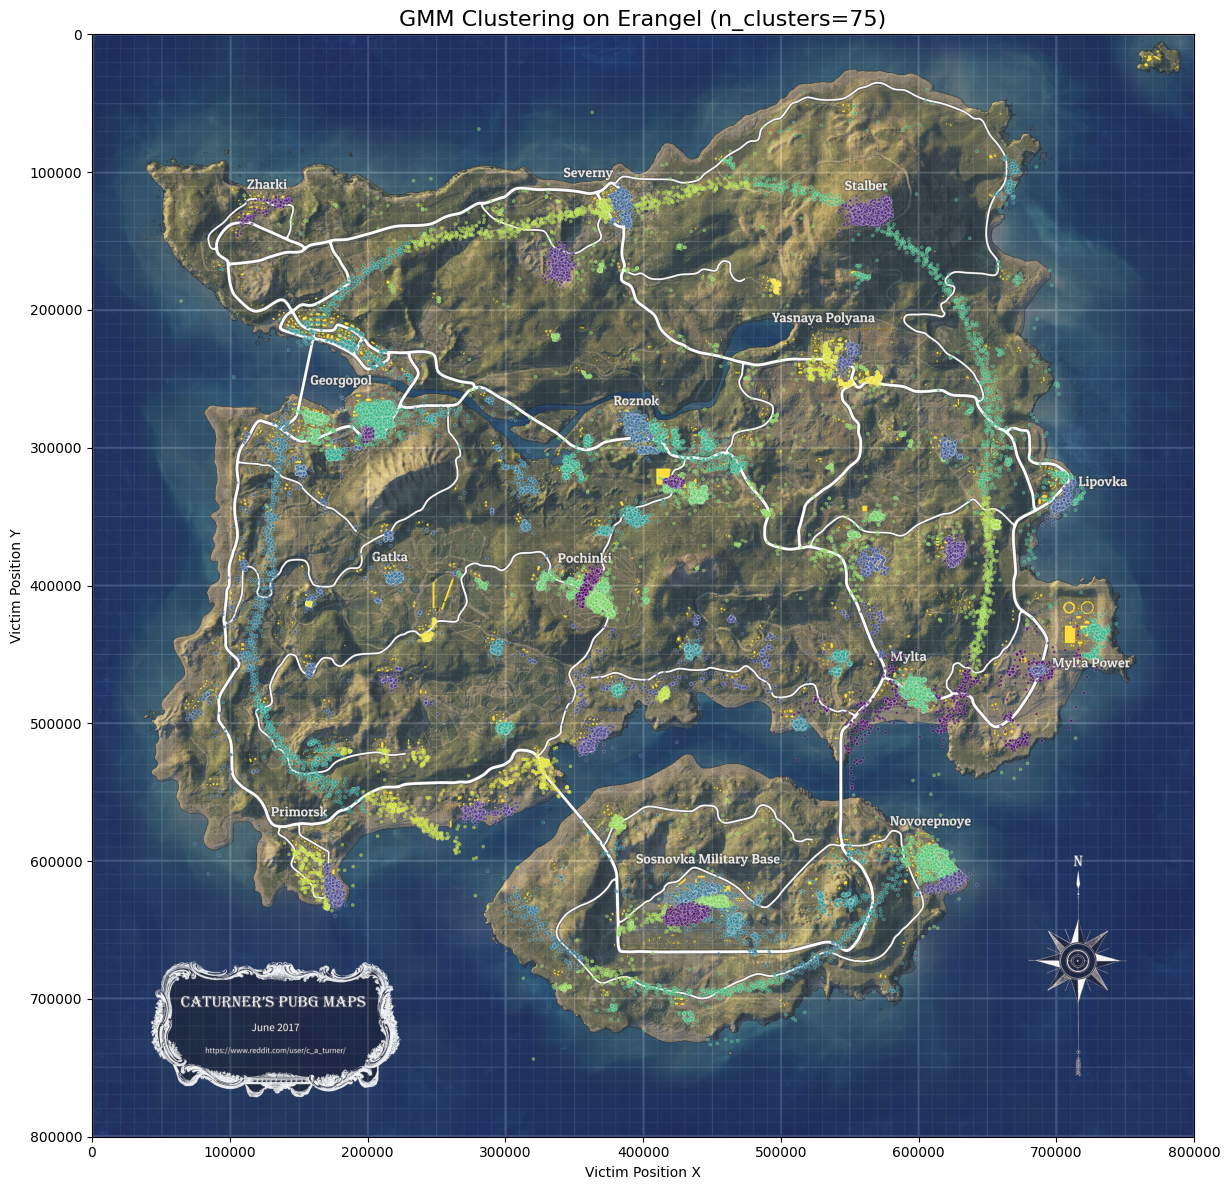

In [ ]:
# --- 1. 라이브러리 임포트 ---
import polars as pl
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
# Scikit-learn 모델 및 스케일러 사용을 위해 필요
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# --- 2. 파일 경로 설정 ---
DATA_PATH = '/content/early_game_coords_erangel.csv'
SCALER_PATH = '/content/scaler_erangel.joblib' # ⭐️ 스케일러 경로 추가
MODEL_PATH = '/content/final_gmm_model_k40.joblib'
MAP_PATH = '/content/erangel.jpg'

# --- 3. 데이터 로딩 및 전처리 ---
print(f"--- 3. 데이터 로딩: {DATA_PATH} ---")
try:
    df = pl.read_csv(DATA_PATH)
    initial_rows = df.height
    df_filtered = df.filter(
        (pl.col('victim_position_x') != 0) & (pl.col('victim_position_y') != 0)
    )
    filtered_rows = df_filtered.height
    print(f"데이터 로딩 완료. 총 {initial_rows}개 행 -> (0,0) 좌표 제거 후 {filtered_rows}개 행 사용.")
except FileNotFoundError:
    print(f"오류: 데이터 파일 '{DATA_PATH}'을 찾을 수 없습니다. 실행을 중단합니다.")
    exit()

# --- 4. 스케일러 및 GMM 모델 불러오기 ---
print(f"\n--- 4. 스케일러 및 GMM 모델 로딩 ---")
try:
    # ⭐️ 스케일러 로딩
    scaler = joblib.load(SCALER_PATH)
    print(f"스케일러 로딩 성공: {SCALER_PATH}")
    # GMM 모델 로딩
    gmm_model = joblib.load(MODEL_PATH)
    best_n_bic = gmm_model.n_components
    print(f"GMM 모델 로딩 성공: {MODEL_PATH}")
except FileNotFoundError as e:
    # 예제 실행을 위해 가상 스케일러/모델 생성 (실제 사용 시 이 부분은 불필요)
    print(f"경고: '{e.filename}' 파일을 찾을 수 없습니다. 예제 실행을 위해 가상 객체를 생성하고 저장합니다.")
    if 'scaler' in str(e):
        print("가상 StandardScaler 생성 및 저장...")
        scaler = StandardScaler().fit(df_filtered.select(['victim_position_x', 'victim_position_y']).to_numpy())
        joblib.dump(scaler, SCALER_PATH)
    if 'gmm_model' in str(e):
        print("가상 GMM 모델 생성 및 저장...")
        coords_for_fit = scaler.transform(df_filtered.select(['victim_position_x', 'victim_position_y']).to_numpy())
        gmm_model = GaussianMixture(n_components=75, random_state=42).fit(coords_for_fit)
        joblib.dump(gmm_model, MODEL_PATH)
        best_n_bic = 75
    print("가상 객체 생성 완료.")


# --- 5. 데이터 스케일링 및 클러스터 예측 ---
print("\n--- 5. 데이터 스케일링 및 클러스터 예측 수행 ---")
# 원본 좌표를 NumPy 배열로 추출
coords_original = df_filtered.select(['victim_position_x', 'victim_position_y']).to_numpy()

# ⭐️ 1. 로딩한 스케일러로 데이터 변환
coords_scaled = scaler.transform(coords_original)
print("데이터 스케일링 적용 완료.")

# ⭐️ 2. 스케일링된 데이터로 클러스터 예측
cluster_predictions = gmm_model.predict(coords_scaled)
print("클러스터 예측 완료.")

# ⭐️ 3. 원본 데이터프레임에 예측 결과('cluster' 컬럼) 추가
# 시각화는 원본 좌표를 사용해야 하므로, 원본 데이터가 있는 df_filtered에 결과를 합칩니다.
results_df = df_filtered.with_columns(pl.Series("cluster", cluster_predictions))
print(results_df.head())

# --- ✨ 수정된 최종 결과 시각화 ---
print("\n--- 6. 최종 클러스터링 결과를 에란겔 맵 위에 시각화 (좌상단 0,0 기준) ---")

# (맵 이미지 로드, 데이터 샘플링 등은 동일)
erangel_map_img = Image.open('/content/erangel.jpg')
sample_df_pd = results_df.sample(n=min(100000, results_df.height), shuffle=True).to_pandas()

plt.figure(figsize=(15, 12))

# --- ✨ 핵심 수정 사항 ---
# extent의 Y축 순서를 [bottom, top] -> [top, bottom]으로 변경하여
# 그래프의 좌표계 자체를 좌상단 (0,0) 기준으로 설정합니다.
plt.imshow(erangel_map_img, extent=[0, 800000, 800000, 0], alpha=0.9)
# ---------------------

# 산점도는 이제 자동으로 올바른 좌표계 위에 그려집니다.
sns.scatterplot(
    data=sample_df_pd,
    x='victim_position_x',
    y='victim_position_y',
    hue='cluster',
    palette='viridis',
    s=5,
    alpha=0.6,
    legend=False,
    ax=plt.gca()
)

# invert_yaxis()는 더 이상 필요 없으므로 삭제합니다.

plt.title(f'GMM Clustering on Erangel (n_clusters={best_n_bic})', fontsize=16)
plt.xlabel('Victim Position X')
plt.ylabel('Victim Position Y')
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()